<a href="https://colab.research.google.com/github/alexagorn/Analytics-with-matplotlib/blob/main/%D0%9A%D0%BE%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D1%96%D0%B9%D0%BD%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%BD%D0%B8%D0%BA%D1%96%D0%B2_%D1%82%D0%B5%D0%BB%D0%B5%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Висхідні дані:
# - df['Тривалість'] — по осі X
# - df['Дельта shr, у %'] — по осі Y
# - df['Блок'] — категоріальний параметр

In [6]:
# Завантаження даних
# Замініть 'your_file.csv' на назву вашого файлу, або завантажте вручну через Colab
df = pd.read_excel('/content/Етерна довідка - Телемагазин - регресійний аналіз.xlsx', sheet_name='РБ без 0 ats')


In [7]:
# Перегляд перших рядків таблиці
df.head()

,День тижня,Дата,Час (початок),Час (Завершення),Тривалість (хвилини),Тривалість,Блок,Початок (заокруглений час),Слот,# Блок,...,53,54,55,56,57,58,59,60,61,65
0,4,2025-05-01,11:54:33,11:59:33,00:05:00,5,48,11:55:00,11,48,...,0,0,0,0,0,0,0,0,0,0
1,4,2025-05-01,14:44:55,14:59:55,00:15:00,15,50,14:45:00,14,50,...,0,0,0,0,0,0,0,0,0,0
2,4,2025-05-01,15:54:41,15:59:41,00:05:00,5,48,15:55:00,15,48,...,0,0,0,0,0,0,0,0,0,0
3,4,2025-05-01,16:55:02,17:00:02,00:05:00,5,110,16:55:00,16,110,...,0,0,0,0,0,0,0,0,0,0
4,5,2025-05-02,10:45:44,11:00:44,00:15:00,15,50,10:46:00,10,50,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Побудова scatter plot
x_column = 'Тривалість'
y_column = 'Дельта shr, у %'

<ipython-input-19-3313877249>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


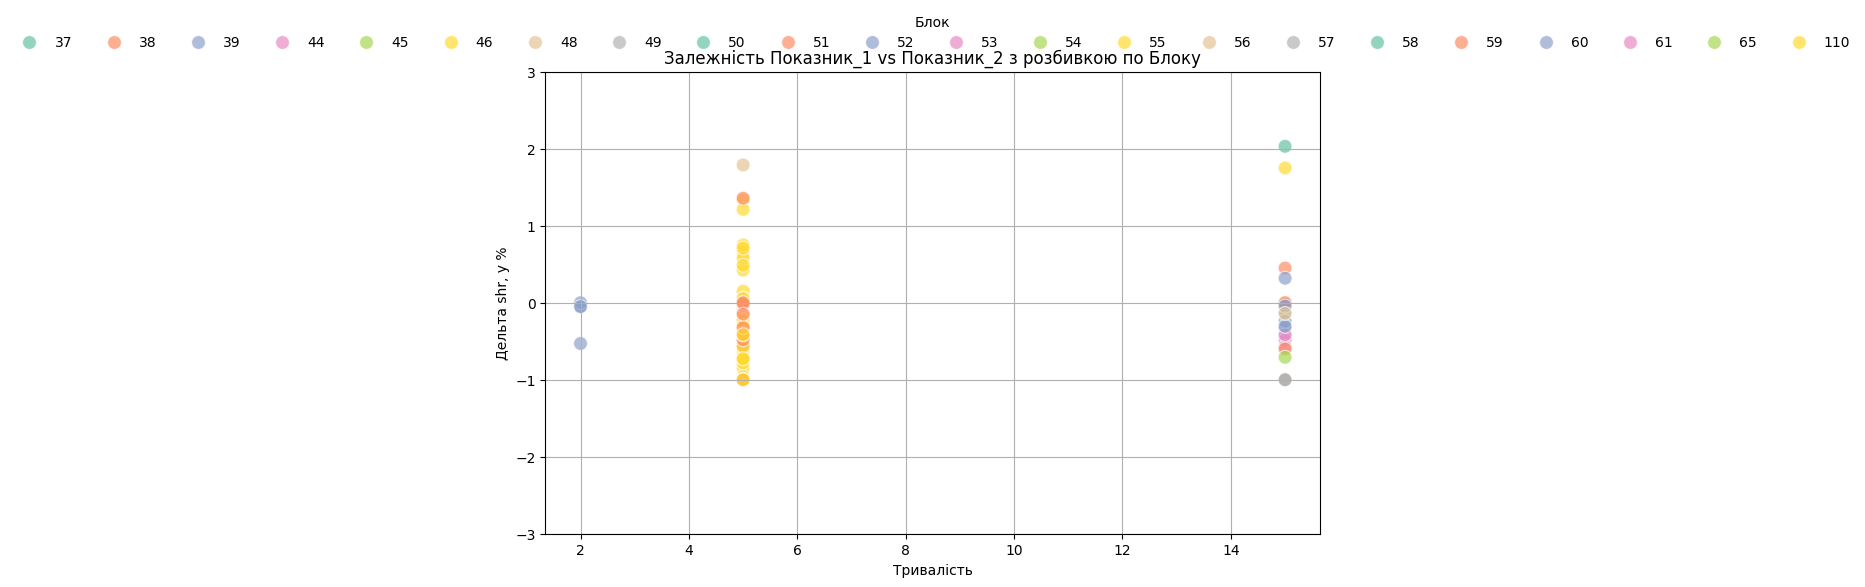

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Тривалість',      # ← назва колонки по X
    y='Дельта shr, у %',      # ← назва колонки по Y
    hue='Блок',          # ← розфарбовує за категорією
    palette='Set2',      # ← кольорова палітра (можна змінити)
    s=100,               # ← розмір точок
    alpha=0.7            # ← прозорість
)
plt.title('Залежність Показник_1 vs Показник_2 з розбивкою по Блоку')
plt.grid(True)
# Розміщення легенди зверху по центру
plt.legend(
    title='Блок',
    loc='upper center',     # ← верхня частина по центру
    bbox_to_anchor=(0.5, 1.15),  # ← координати (x=0.5 — центр, y=1.15 — вище графіка)
    ncol=23,                 # ← кількість колонок у легенді (можеш змінити)
    frameon=False           # ← опційно: без рамки
)

# Явно задати межі по осі Y
plt.ylim(-3, 3)

plt.tight_layout()
plt.show()

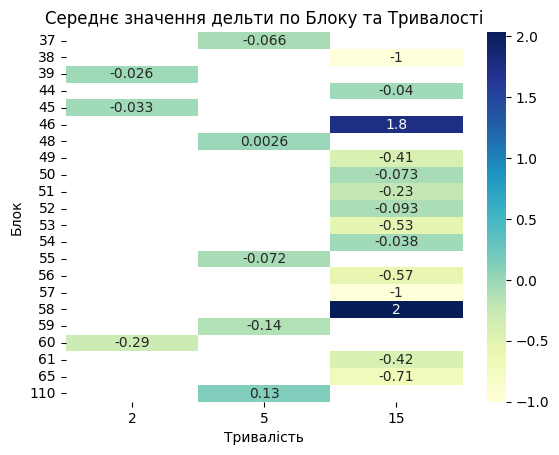

In [22]:
pivot = df.pivot_table(index='Блок', columns='Тривалість', values='Дельта shr, у %', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Середнє значення дельти по Блоку та Тривалості")
plt.show()


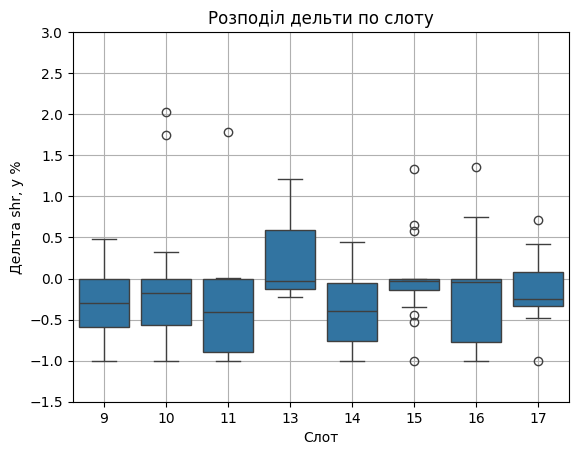

In [30]:
sns.boxplot(data=df, x="Слот", y="Дельта shr, у %")
plt.title("Розподіл дельти по слоту")
plt.ylim(-1.5, 3)  # ← тут встановлюємо межі по Y
plt.grid(True)
plt.show()


In [31]:
import scipy.stats as stats

# Групуємо дані за слотами і створюємо список із значеннями дельти по кожній групі
groups = [group['Дельта shr, у %'].dropna() for name, group in df.groupby('Слот')]

# Запускаємо однофакторний дисперсійний аналіз (ANOVA)
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-статистика: {f_stat:.3f}, p-значення: {p_val:.3g}")

if p_val < 0.05:
    print("Є статистично значуща різниця між слотами — залежність присутня.")
else:
    print("Статистично значущої різниці між слотами немає — залежність не виявлено.")


F-статистика: 0.904, p-значення: 0.505
Статистично значущої різниці між слотами немає — залежність не виявлено.
